In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n_samples = 100
x = np.random.normal(0, 1, n_samples)  # Первый признак
y = 2 * x + np.random.normal(0, 0.5, n_samples)  # Второй признак (коррелирован с первым)

X = np.column_stack((x, y))

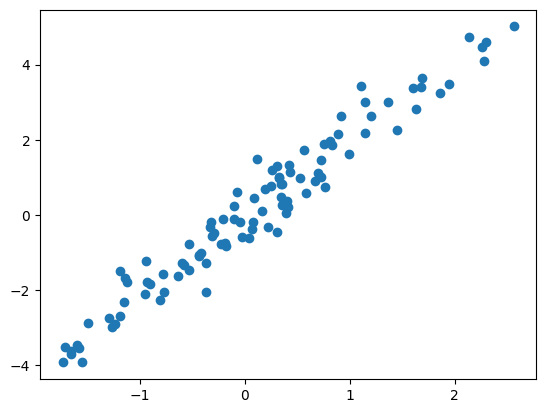

In [4]:
plt.scatter(X[:,0],X[:,1])

In [5]:
from sklearn.decomposition import PCA

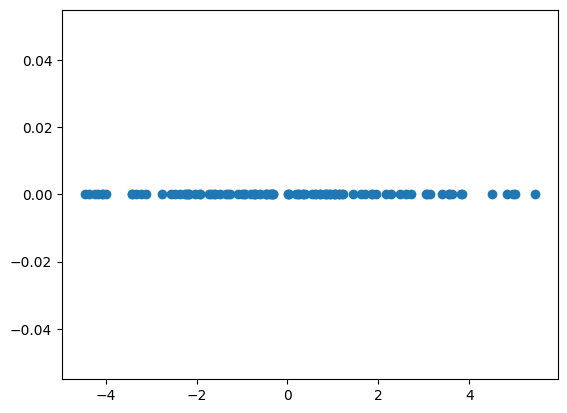

In [6]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca,[0]*np.arange(len(X_pca)))

In [7]:
print(f"Главная компонента (направление): {pca.components_}")
print(f"Объясненная дисперсия: {pca.explained_variance_ratio_}")

Главная компонента (направление): [[0.42473461 0.90531791]]
Объясненная дисперсия: [0.99268385]


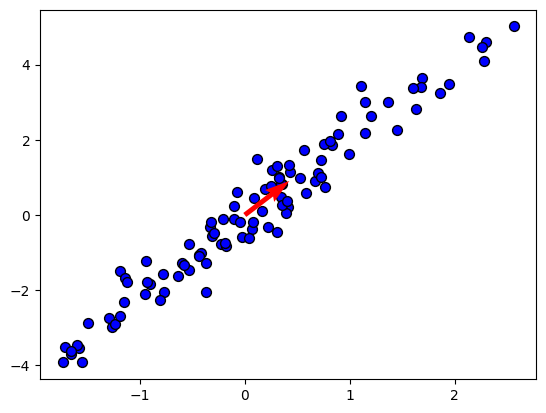

In [8]:
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', s=50)
pc1_direction = pca.components_[0]
plt.quiver(0, 0, pc1_direction[0], pc1_direction[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

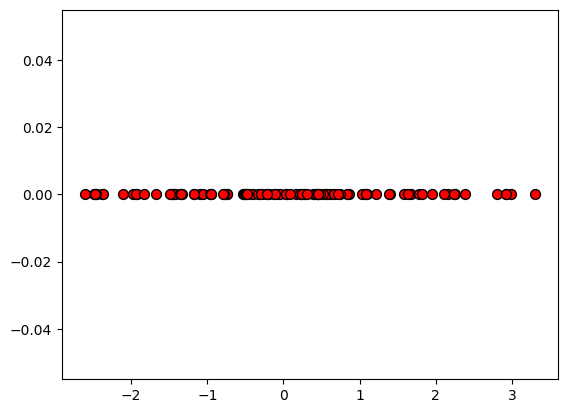

In [10]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)

In [11]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
X.shape

(569, 30)

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Уменьшаем до 2 компонент
X_pca = pca.fit_transform(X_scaled)

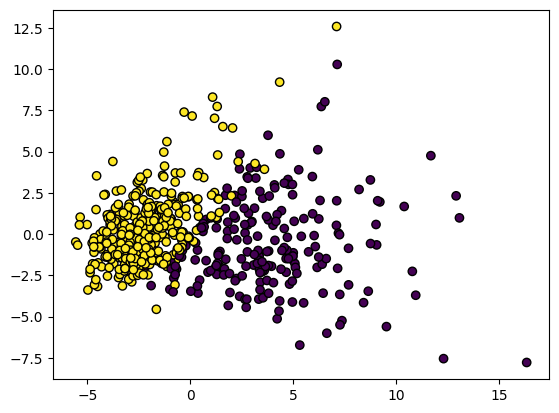

In [13]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=y, edgecolor='k')

In [14]:
print(f"Главная компонента (направление): {pca.components_}")

Главная компонента (направление): [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [15]:
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182]
Суммарная объясненная дисперсия: 0.63


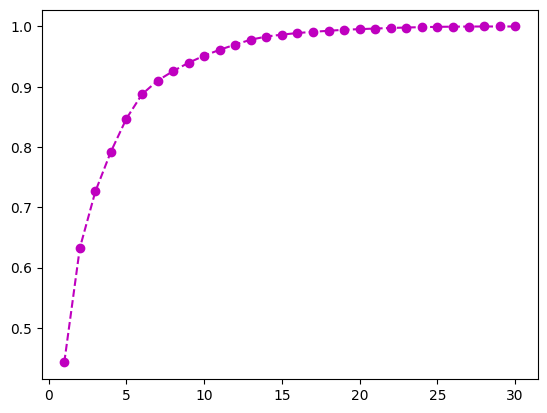

In [16]:
n_components_range = range(1, 31)
explained_variance = []

for n in n_components_range:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance.append(sum(pca.explained_variance_ratio_))

plt.plot(n_components_range, explained_variance, 'mo--')

In [17]:
pca = PCA(n_components=7)  # Уменьшаем до 7 компонент
X_pca = pca.fit_transform(X_scaled)

# Объясненная дисперсия
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]
Суммарная объясненная дисперсия: 0.91


In [18]:
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

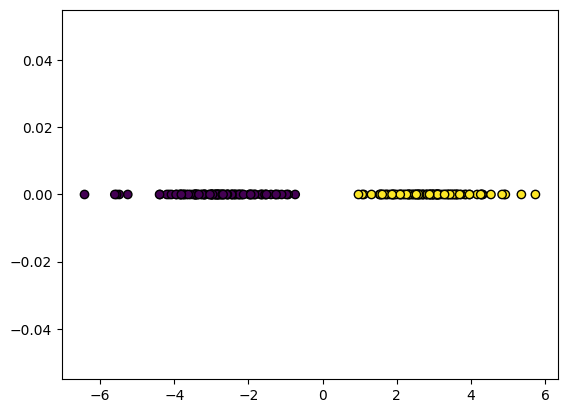

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

plt.scatter(X_lda,np.zeros_like(X_lda),c=y, edgecolor='k')

In [20]:
print(f"Коэффициенты LDA: {lda.coef_}")

Коэффициенты LDA: [[ 7.8137747  10.72116741]]


In [21]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, random_state=170, centers=2)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation) 

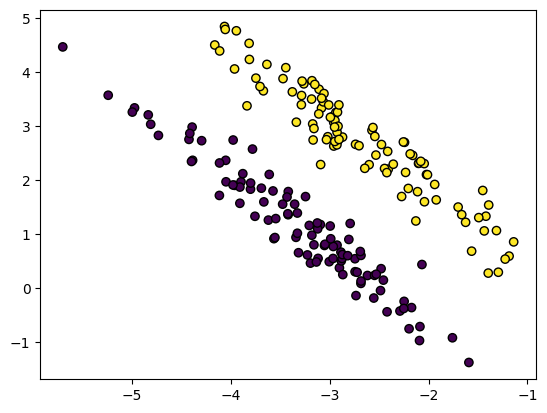

In [22]:
plt.scatter(X[:,0],X[:,1], c = y, edgecolors='k')

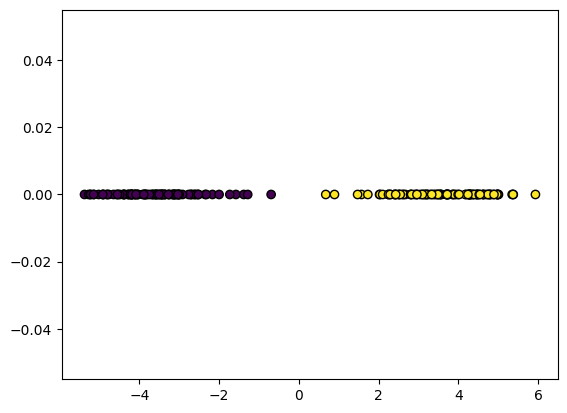

In [23]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

plt.scatter(X_lda,np.zeros_like(X_lda),c=y, edgecolor='k')

# 4. Добавьте третий класс и примените LDA с n_components=2.

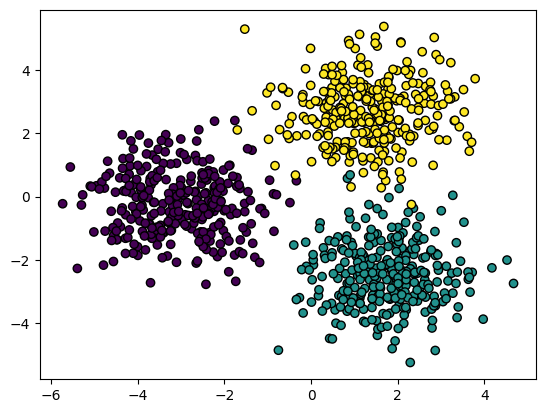

In [24]:
X, y = make_blobs(n_samples=900, centers=3,n_features=15, cluster_std=6)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled,y)

plt.scatter(X_lda[:,0],X_lda[:,1],c=y, edgecolor='k')

# 5. Сравните LDA с PCA на этих же данных. Какой метод лучше разделяет классы?

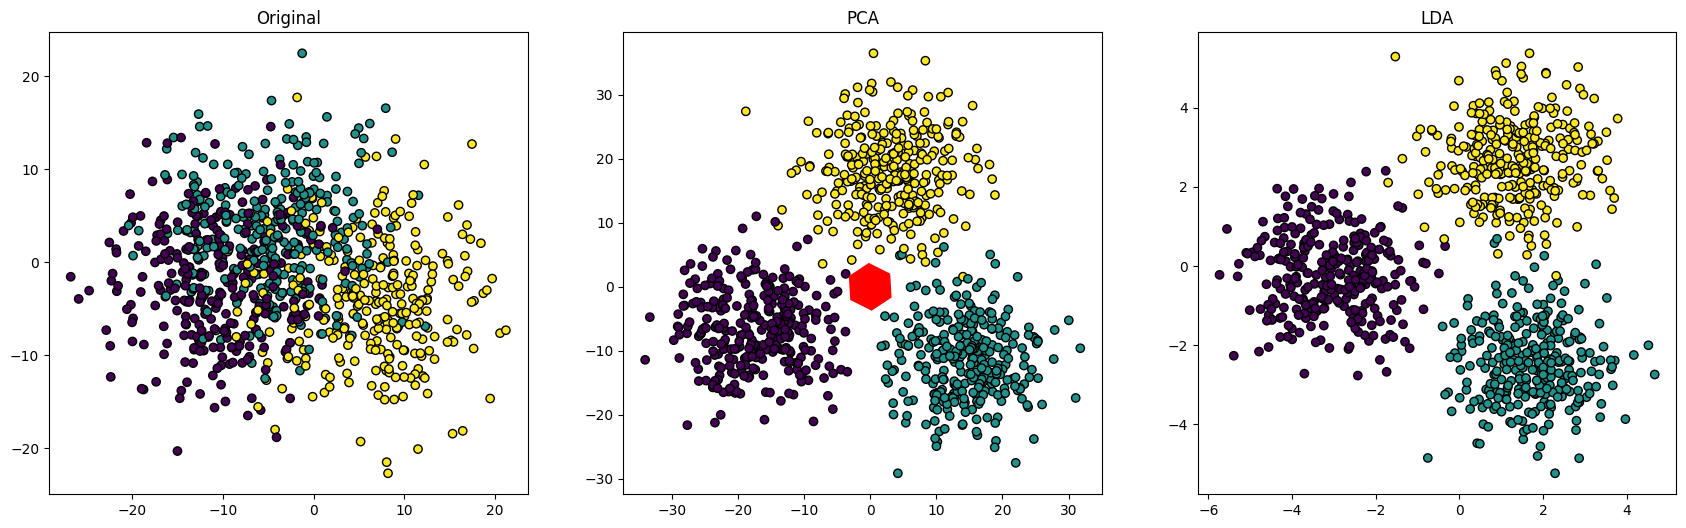

In [25]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


fig, ax = plt.subplots(1,3,figsize=(21,6))



ax[0].scatter(X[:,2],X[:,1], c = y, edgecolors='k')
ax[0].set_title('Original')

ax[1].scatter(X_pca[:,0],X_pca[:,1], c = y, edgecolors='k')
ax[1].set_title('PCA')
pc1_direction = pca.components_[0]
ax[1].quiver(0, 0, pc1_direction[0], pc1_direction[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.1)


ax[2].scatter(X_lda[:,0],X_lda[:,1],c=y, edgecolor='k')
ax[2].set_title('LDA')

plt.show()

Оба метода примерно одинаково хорошо разделяют кластеры

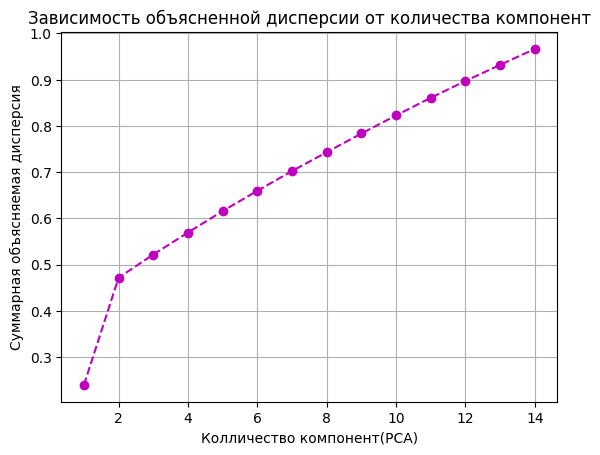

In [26]:
n_components_range = range(1, X.shape[1])
explained_variance = []

for n in n_components_range:
    pca = PCA(n_components=n)
    pca.fit(X)
    explained_variance.append(sum(pca.explained_variance_ratio_))

plt.plot(n_components_range, explained_variance, 'mo--')
plt.title('Зависимость объясненной дисперсии от количества компонент')
plt.ylabel('Суммарная объясняемая дисперсия')
plt.xlabel('Колличество компонент(PCA)')

plt.grid()
plt.show()


PCA разделимость (точность KNN): 0.988
LDA разделимость (точность KNN): 0.989


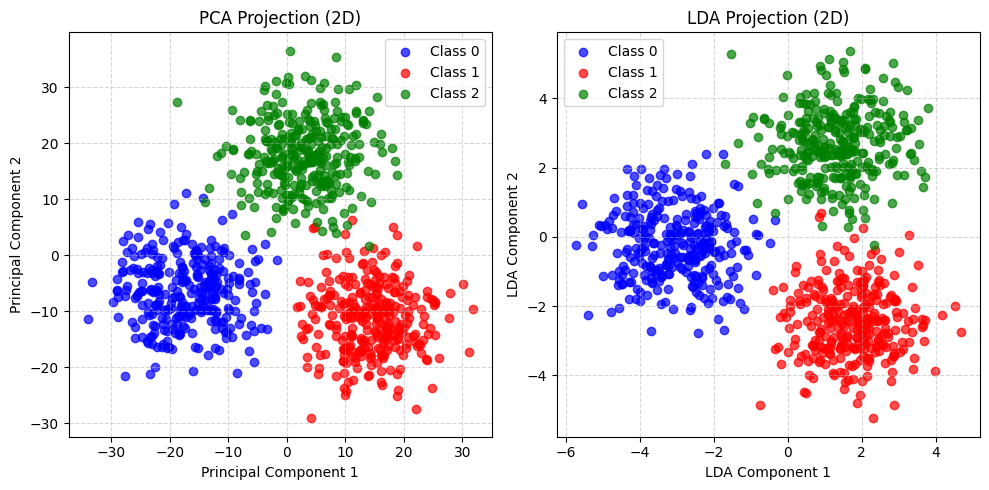

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Функция для оценки разделимости классов
def evaluate_separation(X_transformed, y):
    # Простая оценка через точность KNN
    knn = KNeighborsClassifier(n_neighbors=3)
    scores = cross_val_score(knn, X_transformed, y, cv=5)
    return np.mean(scores)

# Оценка разделимости
pca_score = evaluate_separation(X_pca, y)
lda_score = evaluate_separation(X_lda, y)

print(f"PCA разделимость (точность KNN): {pca_score:.3f}")
print(f"LDA разделимость (точность KNN): {lda_score:.3f}")

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], c='blue', alpha=0.7, label='Class 0')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], c='red', alpha=0.7, label='Class 1')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], c='green', alpha=0.7, label='Class 2')
plt.title('PCA Projection (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
plt.scatter(X_lda[y == 0, 0], X_lda[y == 0, 1], c='blue', alpha=0.7, label='Class 0')
plt.scatter(X_lda[y == 1, 0], X_lda[y == 1, 1], c='red', alpha=0.7, label='Class 1')
plt.scatter(X_lda[y == 2, 0], X_lda[y == 2, 1], c='green', alpha=0.7, label='Class 2')
plt.title('LDA Projection (2D)')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()